Inspi: 

- https://www.kaggle.com/code/hasibalmuzdadid/brain-stroke-analysis-accuracy-96-03/notebook#Basic-Exploration
- https://www.kaggle.com/code/kaanboke/beginner-friendly-end-to-end-ml-project-enjoy
- Emilies
- Exercise 3 fra BDM – tager udgangspunkt i brain stroke datasæt

# 1. Busines Understanding

### The business problem

The dataset used in this project is related to healthcare, as it contains data regarding stroke, which is is a critical life-threatening medical condition.

Stroke is according to the World Health Organization (WHO) the 2nd leading cause of death on a global plan. This accounts for approximately 11% of total deaths being caused by strokes. 

From both a societal and business perspective, it is relevant to address this problem. From a societal perspective, the health of patients can be improved. From a business perspective, it can redue costs related to hospitalization and treatment of hospitals. 

The dataset applied to this project is used to predict whether a patient is likely to encounter a stroke or not. The prediction is based on a variety of input parameters, which provides relevant information characterizing the individual patient. 


### Understanding of the context

Initially it is important to gather insights regarding the context of the problem we are scoping. 

- Information on brain strokes
https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset?resource=download

# 2. Data Understanding

Initially, we conduct an exploratory data analysis to get insights into the dataset.

### Importing libraries and packages

In [143]:
# Importing packages and libraries
import pandas as pd #Used
import numpy as np #Used
import imblearn #Used
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import decomposition, datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE #Used
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV #Used
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier #Used
from sklearn.tree import plot_tree #Used
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix, classification_report #Used
from sklearn.neighbors import KNeighborsClassifier

## OBS dont import libraries we dont use

### Importing dataset

In [144]:
# Importing the csv file containing the dataset 
df = pd.read_csv('strokes.csv', sep=',')

### Attribute Information

To get insight to the dataset, we look at the attributes and their values.

The dataset has 12 attributes, where one of them is the target value (`stroke`)

- **id:** Unique identifier

- **gender:** Indicating the gender of the patient - "Male", "Female" or "Other"

- **age:** Age of the patient

- **hypertension:** 0 (the patient doesn't have hypertension), 1 (the patient has hypertension)

- **heart_disease:** 0  (the patient doesn't have any heart diseases), 1 (the patient has a heart disease)

- **ever_married:** Indicating if the patient has ever been married - "No" (the patient has not been married) "Yes"

- **work_type:** Indicating what type of work the patient has - "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

- **Residence_type:** Indicating the type of setting where the patient lives - "Rural" or "Urban"
    - *Rural:* Indicates that the location is generally out in the country, outside of cities, typically not densely populated.
    - *Urban:* Indicates that the location is in the city - a location that is densely populated.
    
- **avg_glucose_level:** average glucose level in blood

- **bmi:** Body Mass Index

- **smoking_status:** Indicates the smoking status of the patient - "formerly smoked", "never smoked", "smokes" or "Unknown"*
    - *Note:* "Unknown" in `smoking_status` means that the information is unavailable for this patient.

- **stroke:** The target value, indicating whether the patient has had a stroke or not - 1 (the patient had a stroke) or 0 (the patient hsa not had a stroke)

Reference: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset


### Dataset insights

In [145]:
# Shape of the dataset - Number of rows and columns
df.shape

(5110, 12)

**Insights:**
- The dataset has 5110 rows and 12 columns (attributes)

In [146]:
# Display top 5 instances of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


- The dataset contains 5110 instances with 11 features and 1 output variable 
- We will drop the **id**-column later on, as it doesn't affect the prediction of the target value.

In [147]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Insights:**
- The dataset contains both *numerical* and *categorical* variables
    - 5 numerical features: age, hypertension, heart_disease, avg_glucose_level, bmi, stroke
    - 4 categorical features: gender, ever_married, work_type, Residence_type, smoking_status
- The *categorical* features will need to be encoded to numerical values, which will be done later on.
- The *bmi*-column contains null-values, which we will look further into

In [148]:
# Analyze summary statistics - numeric columns
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [149]:
# Analyze summary statistics - categorical (object) columns
df.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


#### Duplicates

In [150]:
# Checking for duplicate values
df.duplicated().sum()

0

**Insights:**
- There is 0 duplciates among the total 5110 entries in the dataset

#### Null-values

In [151]:
# Checking for null values - amount and percentage of missing values for each attribute
def missing_values (df):
    number_missing = df.isnull().sum()
    percentage_missing = round(df.isnull().mean()*100,2)
    values_missing = pd.concat([number_missing, percentage_missing], axis=1, keys=['Missing Values (amount)', 'Missing Values (%)'])
    return values_missing

missing_values(df)

,Missing Values (amount),Missing Values (%)
id,0,0.00
gender,0,0.00
age,0,0.00
hypertension,0,0.00
heart_disease,0,0.00
ever_married,0,0.00
work_type,0,0.00
Residence_type,0,0.00
avg_glucose_level,0,0.00
bmi,201,3.93


**Insights:**
- There are 201 null-values in the *bmi*-column, meaning that there are missing values. This corresponds to approx. 4% missing values within the *bmi*-column.
- The rows with missing valus will be dropped later on.


### Target Variable

In [152]:
# We take a look at the values of the target variable (y)
y = df['stroke']

# sum(y)/len(y)*100

# Percentage and number of patients that had a stroke:
print(f'Percentage of patients that had a stroke: {round(y.value_counts(normalize=True)[1]*100,2)}% ({y.value_counts()[1]} patients) ')
      
# Percentage of patient that had a stroke:
print(f'Percentage of patients that did not have a stroke: {round(y.value_counts(normalize=True)[0]*100,2)}% ({y.value_counts()[0]} patients)')

Percentage of patients that had a stroke: 4.87% (249 patients) 
Percentage of patients that did not have a stroke: 95.13% (4861 patients)


**Insights:**
- Approx. 5% instances of the target variable is 1 (*stroke*) --> 249 of the patients did have a stroke
- Approx. 95% instances of the target variable is 0 (*no stroke*) --> 4861 of the patients did not have a stroke 


    --> This indicates that the dataset contains imbalanced data, as the target class labels are unequally distributed

Text(0.5, 1.0, 'Stroke')

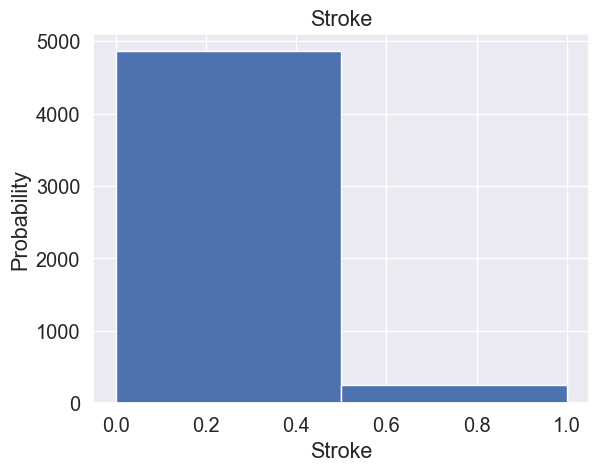

In [153]:


plt.hist(df['stroke'], bins=2)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Stroke');
plt.title('Stroke')

Exercise from lecture 6:
"To get more inisght about our data is good also to plot the disrtibution of certain attributes of interest. You can plot the histogram of Spending_Score attribute by selecting that column from the data frame and adding .hist(). Do the same for the Annual_Income column. How are their distributions?"

Lecture 6 exercise: Another useful way to get insight about our data is to plot one variable of interest with respect to another by using a scatter plot. To do so, matplotlib.pyplot can be used. Complete the code below to obtain a scatter plot with Annual_Income along the x-axis and Spending_Score along the y-axis.

### Imbalanced Data
**Insights:**
- We see that instances across classes are imbalanced, which indicates that the dataset is imbalanced
- There are 19 times (4861/249) more patients that did not have stroke than patients that did have had a stroke. Thereby the non-stroke class dominates the stroke class.
    - Intermediate calculation: 4861+249=5110

- The stroke ratio is 0.05 (249/5110), which indicates an extreme degree of imbalance. 

    --> We will address imbalanced data later on

Reference: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

# 3. Data Preparation

#### Machine Learning Problem

- In this project we encounter a binary classification problem.
- The prediction is made on the `stroke`-attribute, which is the target variable.
- The purpose is to build a machine learning model, that provides the best prediction on the `stroke`-variable.

In [154]:
# Dropping "ID" column from dataframe
df = df.drop('id', axis='columns')

# Shape of dataset after dropping 'id'-attribute
print (f' The dataset contains {df.shape[0]} instances with {df.shape[1]-1} features and 1 output variable')

# Display top 5 instances of dataset
df.head()

 The dataset contains 5110 instances with 10 features and 1 output variable


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Adjusting for null values

In [155]:
# Dropping null values from dataframe
# df.dropna(axis = 0, inplace = True)
# print (f' The shape of the dataset after dropping null values is {df.shape}')



##### Imputation

Because it is already a rather small dataset, it is preferred not to remove instances with missing values. Instead, we perform imputation where we replace the missing values instead of removing them.
We do this by replacing the missing values with the mean of the rest of the values in the given column

In [156]:
# Replacing missing values with the mean of the rest of the values in the BMI column
df['bmi'] = df['bmi'].replace(np.nan, df['bmi'].mean())

# Checking that the imputation worked 
for col in df:
    print(df[col].isnull().sum(), "missing values in", col)
    
# Source: exercise in lecture 6 

0 missing values in gender
0 missing values in age
0 missing values in hypertension
0 missing values in heart_disease
0 missing values in ever_married
0 missing values in work_type
0 missing values in Residence_type
0 missing values in avg_glucose_level
0 missing values in bmi
0 missing values in smoking_status
0 missing values in stroke


#### Renaming attributes and values

In [157]:
# Renanming column names to get a standardized dataset
df.rename(columns={"gender": "Gender","age": "Age","hypertension":"Hypertension","heart_disease":"Heart_disease","ever_married":"Ever_married","work_type":"Work_type","avg_glucose_level": "Avg_glucose_level","bmi":"BMI","smoking_status":"Smoking_status","stroke":"Stroke"}, inplace = True)

# Renaming value names of attributes
df["Work_type"].replace({"Self-employed":"Self_employed","children":"Children", "Govt_job":"Government_job", "Private":"Private_job"}, inplace = True)
df["Smoking_status"].replace({"never smoked":"Never Smoked","formerly smoked":"Formerly Smoked", "smokes":"Smokes"}, inplace = True)
# Encoding categorical to binary value
df["Ever_married"].replace({"No":0, "Yes":1}, inplace = True)

# Changing the order of the attributes
df = df[["Age","Gender","Ever_married","BMI","Work_type","Residence_type","Smoking_status","Hypertension","Heart_disease","Avg_glucose_level","Stroke"]]

# Printing a glimpse of dataset after processing
print("After preprocessing, the data set looks as follows :")
df.head()

After preprocessing, the data set looks as follows :


,Age,Gender,Ever_married,BMI,Work_type,Residence_type,Smoking_status,Hypertension,Heart_disease,Avg_glucose_level,Stroke
0,67.0,Male,1,36.600000,Private_job,Urban,Formerly Smoked,0,1,228.69,1
1,61.0,Female,1,28.893237,Self_employed,Rural,Never Smoked,0,0,202.21,1
2,80.0,Male,1,32.500000,Private_job,Rural,Never Smoked,0,1,105.92,1
3,49.0,Female,1,34.400000,Private_job,Urban,Smokes,0,0,171.23,1
4,79.0,Female,1,24.000000,Self_employed,Rural,Never Smoked,1,0,174.12,1


#### Encode categorical attributes to numerical

As identified under data understanding, there are attribtues in the dataset that need som preprossing.

We identified 4 categorical attributes that need to be encoded into numerical values. The multiple nominal variable are converted into multiple binary-valued features (0s and 1a) by applying the pandas get_dummies()-function. 

The categorical features are: gender, ever_married, work_type, Residence_type, smoking_status


In [158]:
# encode categorical attributes
encoded = pd.get_dummies(df)
# df_encoded = encoded 
df = encoded # Remove comment if you want the whole dataframe changed
# https://www.turing.com/kb/convert-categorical-data-in-pandas-and-scikit-learn#label-encoding
# https://datagy.io/sklearn-one-hot-encode/


In [159]:
# Shifting the column with the target variable "Stroke" to the last column of dataframe to perform iloc
shift = df['Stroke'] 
df = df.drop('Stroke', axis = 1)
df = df.join(shift)

In [160]:
# Dataframe after pre-processing
df.head()

,Age,Ever_married,BMI,Hypertension,Heart_disease,Avg_glucose_level,Gender_Female,Gender_Male,Gender_Other,Work_type_Children,...,Work_type_Never_worked,Work_type_Private_job,Work_type_Self_employed,Residence_type_Rural,Residence_type_Urban,Smoking_status_Formerly Smoked,Smoking_status_Never Smoked,Smoking_status_Smokes,Smoking_status_Unknown,Stroke
0,67.0,1,36.600000,0,1,228.69,0,1,0,0,...,0,1,0,0,1,1,0,0,0,1
1,61.0,1,28.893237,0,0,202.21,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1
2,80.0,1,32.500000,0,1,105.92,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
3,49.0,1,34.400000,0,0,171.23,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
4,79.0,1,24.000000,1,0,174.12,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1


In [161]:
# Dataframe info after pre-processing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             5110 non-null   float64
 1   Ever_married                    5110 non-null   int64  
 2   BMI                             5110 non-null   float64
 3   Hypertension                    5110 non-null   int64  
 4   Heart_disease                   5110 non-null   int64  
 5   Avg_glucose_level               5110 non-null   float64
 6   Gender_Female                   5110 non-null   uint8  
 7   Gender_Male                     5110 non-null   uint8  
 8   Gender_Other                    5110 non-null   uint8  
 9   Work_type_Children              5110 non-null   uint8  
 10  Work_type_Government_job        5110 non-null   uint8  
 11  Work_type_Never_worked          5110 non-null   uint8  
 12  Work_type_Private_job           51

In [162]:
# Extracting the dataframe after pre-processing to csv file, creating a cleansed dataset 
#df.to_csv(r'cleansed_dataset.csv')

## Selecting informative attributes

How do we select an attribute to partition data in an informative way? Segment the data into groups that are as pure as possible.
By pure we mean homogeneous with respect to the target variable.

Methods for selecting relevant features (lecture 3)
- Gini impurity
- Entropy
- Information gain
- DAG for visualizing causal inferences from observational data.

Må gæres senere
Se evt. https://machinelearningmastery.com/feature-selection-with-numerical-input-data/


Correlation map (https://www.kaggle.com/code/helenaglaring/brain-stroke-analysis-accuracy-96-0-32bc8c/edit)


## Addressing Imbalanced Data using SMOTE

#### Declaring feature vector X and target vector y

In [163]:
# Selecting the relevant attributes and creating the features vector X and the target vector y.
y = df['Stroke']
X = df.iloc[:,:-1] # All rows, columns from 0 to second last (last column is target)


#y = df.iloc[:, -1].values # All rows, last column
#X = df.iloc[:, 1:-1].values # All rows, column 1 to second last (last column is target variable)
#https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/

Synthetic Minority Over-sampling TEchnique (SMOTE) is applied as a preprocessing technique to address the identified class imbalance in the dataset.
The target variable 'Stroke' was found to unbalanced, as the 'stroke'-patients were highly unrepresented compared to the 'non-stroke' patients. 

In [164]:
# Here we declare SMOTE that is used to perform over-sampling and thereby resample the minority class 
from collections import Counter
sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X, y) 

print('----------- Original dataset ----------')

print('Distribution of Non-Strokes (0) and Strokes (1) in target variable before performing SMOTE %s' % Counter(y))
print(f'''Shape of X before SMOTE: {X.shape}
Shape of y before SMOTE: {y.shape}''')

print('----------- Re-sampled dataset ----------')
print('Distribution of Non-Strokes (0) and Strokes (1) in target variable before after SMOTE %s' % Counter(y_res))

print(f'''Shape of X after SMOTE: {X_res.shape}
Shape of y after SMOTE: {y_res.shape}''')

# source: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#r001eabbe5dd7-1

----------- Original dataset ----------
Distribution of Non-Strokes (0) and Strokes (1) in target variable before performing SMOTE Counter({0: 4861, 1: 249})
Shape of X before SMOTE: (5110, 20)
Shape of y before SMOTE: (5110,)
----------- Re-sampled dataset ----------
Distribution of Non-Strokes (0) and Strokes (1) in target variable before after SMOTE Counter({1: 4861, 0: 4861})
Shape of X after SMOTE: (9722, 20)
Shape of y after SMOTE: (9722,)


# 4. Modeling

Now we split the dataset into a train-test split to be able to evaluate the oerformance of the model trained sith training data on new unseen data (the test data)

We use ratio of 0.2 that means 80% data for training and 20% data for validation process.

In [165]:
# Splitting data into two; training and test dataset. A train-test split is made for the both the original and resampled dataset
folds = 5

# Train-test split without SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/folds, random_state=42)

# Train-test split with SMOTE
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=1/folds, random_state=42)

print("---------- Before SMOTE ----------")
print("Shape of x_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of x_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

print("---------- After SMOTE ----------")
print("Shape of x_train dataset: ", X_train_res.shape)
print("Shape of y_train dataset: ", y_train_res.shape)
print("Shape of x_test dataset: ", X_test_res.shape)
print("Shape of y_test dataset: ", y_test_res.shape)


---------- Before SMOTE ----------
Shape of x_train dataset:  (4088, 20)
Shape of y_train dataset:  (4088,)
Shape of x_test dataset:  (1022, 20)
Shape of y_test dataset:  (1022,)
---------- After SMOTE ----------
Shape of x_train dataset:  (7777, 20)
Shape of y_train dataset:  (7777,)
Shape of x_test dataset:  (1945, 20)
Shape of y_test dataset:  (1945,)


In [166]:
# Calculating the original proportion of Stroke outcomes with respect to the total number of cases before SMOTE
#sum(y)/len(y)*100

# Calculating the new proportion of Stroke outcomes with respect to the total number of cases after SMOTE
#sum(y_res)/len(y_res)*100
print(f'''Proportion of stroke outcomes after SMOTE: {sum(y_res)/len(y_res)*100}''')

Proportion of stroke outcomes after SMOTE: 50.0


## Baseline model

### ZeroR

In [167]:
# Calculating ZeroR baseline model for "Stroke" column
zeroR = y.value_counts()[df['Stroke'].min()]/(y.value_counts()[df['Stroke'].max()] + y.value_counts()[df['Stroke'].min()])
print(zeroR)

0.9512720156555773


## 

## Models

### 1. Classification Tree

In [168]:
# --- WITHOUT SMOTE ---
# Defining an initial classification tree - without SMOTE
dtree = DecisionTreeClassifier(random_state = 42)

# Fitting the model to training set - without SMOTE
dtree = dtree.fit(X_train, y_train)

# Predicting X in testing set - without SMOTE
y_dtree_pred = dtree.predict(X_test)


# --- WITH SMOTE ---
# Creating an initial classification tree with SMOTE
dtree_res = DecisionTreeClassifier(random_state = 42)

# Fitting model to training set - with SMOTE
dtree_res = dtree_res.fit(X_train_res, y_train_res)

# Predicting X in testing set - with SMOTE
y_dtree_pred_res = dtree_res.predict(X_test)


# Printing scores on training and testing set for both models
# Accuracy-score
print("Accuracy on training set without SMOTE: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on training set with SMOTE: {:.3f}\n".format(dtree_res.score(X_train_res, y_train_res)))
print("Accuracy of the model without SMOTE using testing data: {:.3f}".format(dtree.score(X_test, y_test)))
print("Accuracy of the model with SMOTE using testing data: {:.3f}\n".format(dtree_res.score(X_test, y_test)))
# Precision-score
print('Precision-score without SMOTE: %.3f' % precision_score(y_test, y_dtree_pred))
print('Precision-score with SMOTE: %.3f \n' % precision_score(y_test, y_dtree_pred_res))
# Recall-score
print('Recall-score without SMOTE: %.3f' % recall_score(y_test, y_dtree_pred))
print('Recall-score with SMOTE: %.3f' % recall_score(y_test, y_dtree_pred_res))



# .3f = format  value as a float to 3 decimal places

# source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Accuracy on training set without SMOTE: 1.000
Accuracy on training set with SMOTE: 1.000

Accuracy of the model without SMOTE using testing data: 0.915
Accuracy of the model with SMOTE using testing data: 0.961

Precision-score without SMOTE: 0.255
Precision-score with SMOTE: 0.677 

Recall-score without SMOTE: 0.210
Recall-score with SMOTE: 0.677


In [169]:
# Applying feature_importances_ on the classification tree
importance = dtree.feature_importances_

# source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_


In [170]:
# Creating a dataframe with the feature importance values
data = list(zip(df.columns, dtree.feature_importances_))
df_feature_importance = pd.DataFrame(data, columns =['Feature', 'Importance'])

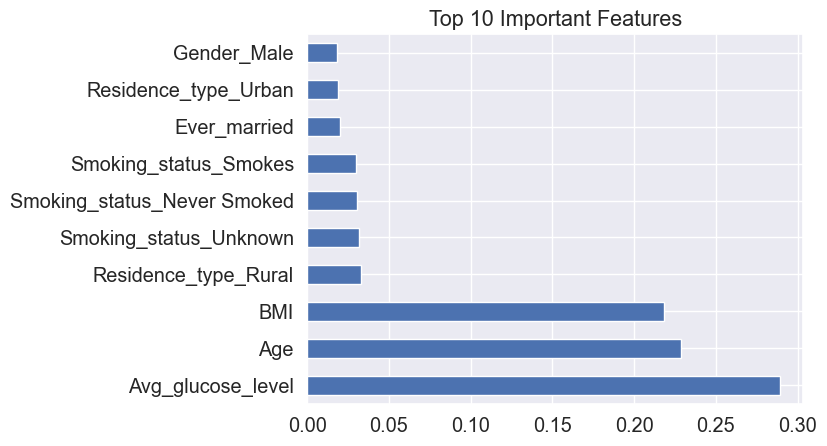

In [171]:
# ---------- WITHOUT SMOTE ----------
# Plotting top 10 feature importances of the classification tree
feature_importances = pd.Series(dtree.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

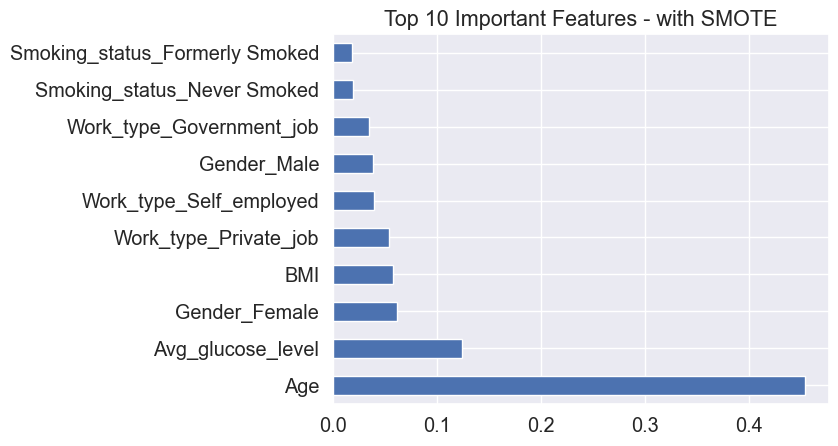

In [172]:
# ---------- WITH SMOTE ----------
# Plotting top 10 feature importances of the classification tree  - WITH SMOTE
feature_importances_res = pd.Series(dtree_res.feature_importances_, index=X.columns)
feature_importances_res.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features - with SMOTE")
plt.show()

#### RandomizedSearchCV

Alternative method for optimizing hyperparameters:
- Grid search

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.


Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
Source: https://medium.com/@senapati.dipak97/grid-search-vs-random-search-d34c92946318

In [173]:

# Applying RandomizedSearchCV for hyperparameter optimization
# Declaring parameters to search through 
parameters = {'max_depth' : (2,4,5,6,7),
              'min_samples_leaf' : [1,2,3,4,5],
              'max_leaf_nodes' : [14,16,18,20,22],
              'min_samples_split' : [2,3,4,5],
              'criterion' : ('gini', 'entropy')
             }

# Creating models using RandomizedSearchCV - without and with SMOTE
dtree_tuned_pipeline = make_pipeline(StandardScaler(), 
                                    RandomizedSearchCV(DecisionTreeClassifier(), 
                                                       random_state = 5, param_distributions = parameters, 
                                                       cv = 5, verbose = True, scoring = 'recall'))
dtree_tuned_pipeline_res  = make_pipeline(StandardScaler(), 
                                       RandomizedSearchCV(DecisionTreeClassifier(), 
                                                          random_state = 5, param_distributions = parameters, 
                                                          cv = 5, verbose = True, scoring = 'recall'))

# Fitting models to training set
# Without SMOTE
dtree_tuned = dtree_tuned_pipeline .fit(X_train,y_train)
# With SMOTE
dtree_tuned_res = dtree_tuned_pipeline_res.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


#### Identifying optimal hyperparameters

In [174]:
# Identifying the most optimal hyperparameters without SMOTE
dtree_tuned[1].best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 14,
 'max_depth': 7,
 'criterion': 'gini'}

In [175]:
# Identifying the most optimal hyperparameters with SMOTE
dtree_tuned_res[1].best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 20,
 'max_depth': 6,
 'criterion': 'entropy'}

#### Optimized models

In [176]:
# Optimizing model without SMOTE 
dtree_tuned = DecisionTreeClassifier(min_samples_split=2, 
                                   min_samples_leaf=1,
                                   max_leaf_nodes=14,
                                   max_depth=7, 
                                   criterion='gini')

In [177]:
# Optimizing Classification Tree model with SMOTE 
dtree_tuned_res = DecisionTreeClassifier(min_samples_split=5, 
                                   min_samples_leaf=2,
                                   max_leaf_nodes=20,
                                   max_depth=6, 
                                   criterion='entropy')

In [178]:
# Fitting models to training set 

# without SMOTE
dtree_tuned.fit(X_train, y_train)

# with SMOTE 
dtree_tuned_res.fit(X_train_res, y_train_res)



DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=20,
                       min_samples_leaf=2, min_samples_split=5)

#### Predicting 

In [179]:
# Predicting X in testing data - this is equal to y

# Predicting X in testing data without SMOTE
y_dtree_pred = dtree_tuned.predict(X_test)

# Predicting X in testing data with SMOTE
y_dtree_pred_res = dtree_tuned_res.predict(X_test)


# Printing scores on training and testing set for both models
print("Accuracy on training set without SMOTE: {:.3f}".format(dtree_tuned.score(X_train, y_train)))
print("Accuracy on training set with SMOTE: {:.3f}\n".format(dtree_tuned_res.score(X_train_res, y_train_res)))

print("Accuracy of the model without SMOTE using testing data: {:.3f}".format(dtree_tuned.score(X_test, y_test)))
print("Accuracy of the model with SMOTE using testing data: {:.3f}\n".format(dtree_tuned_res.score(X_test, y_test)))
print('Precision-score without SMOTE: %.3f' % precision_score(y_test, y_dtree_pred))
print('Precision-score with SMOTE: %.3f \n' % precision_score(y_test, y_dtree_pred_res))
print('Recall-score without SMOTE: %.3f' % recall_score(y_test, y_dtree_pred))
print('Recall-score with SMOTE: %.3f' % recall_score(y_test, y_dtree_pred_res))

# Calculating accuracy by hand
##print('Accuracy: ', sum(y_test==y_pred)/len(y_test)) # by hand

# Calcylating accuracy by using metrics library
#from sklearn import metrics 
#print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy on training set without SMOTE: 0.956
Accuracy on training set with SMOTE: 0.870

Accuracy of the model without SMOTE using testing data: 0.939
Accuracy of the model with SMOTE using testing data: 0.815

Precision-score without SMOTE: 0.500
Precision-score with SMOTE: 0.193 

Recall-score without SMOTE: 0.016
Recall-score with SMOTE: 0.645


Hvorfor bliver den 0?
TJEK

#### Confusion Matrices

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


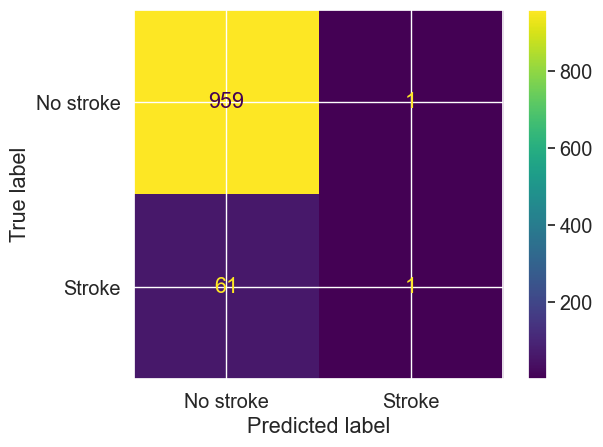

In [180]:
# ---------- without SMOTE ----------
# Confusion matrix plot for model without SMOTE
plot_confusion_matrix(dtree_tuned, X_test, y_test, display_labels = ["No stroke", "Stroke"])


In [181]:
# Printing precision and recall score for model with and without SMOTE
print('Precision-score without SMOTE: %.3f' % precision_score(y_test, y_dtree_pred))
print('Precision-score with SMOTE: %.3f \n' % precision_score(y_test, y_dtree_pred_res))

print('Recall-score without SMOTE: %.3f' % recall_score(y_test, y_dtree_pred))
print('Recall-score with SMOTE: %.3f' % recall_score(y_test, y_dtree_pred_res))

Precision-score without SMOTE: 0.500
Precision-score with SMOTE: 0.193 

Recall-score without SMOTE: 0.016
Recall-score with SMOTE: 0.645


#### Classification Tree Plots

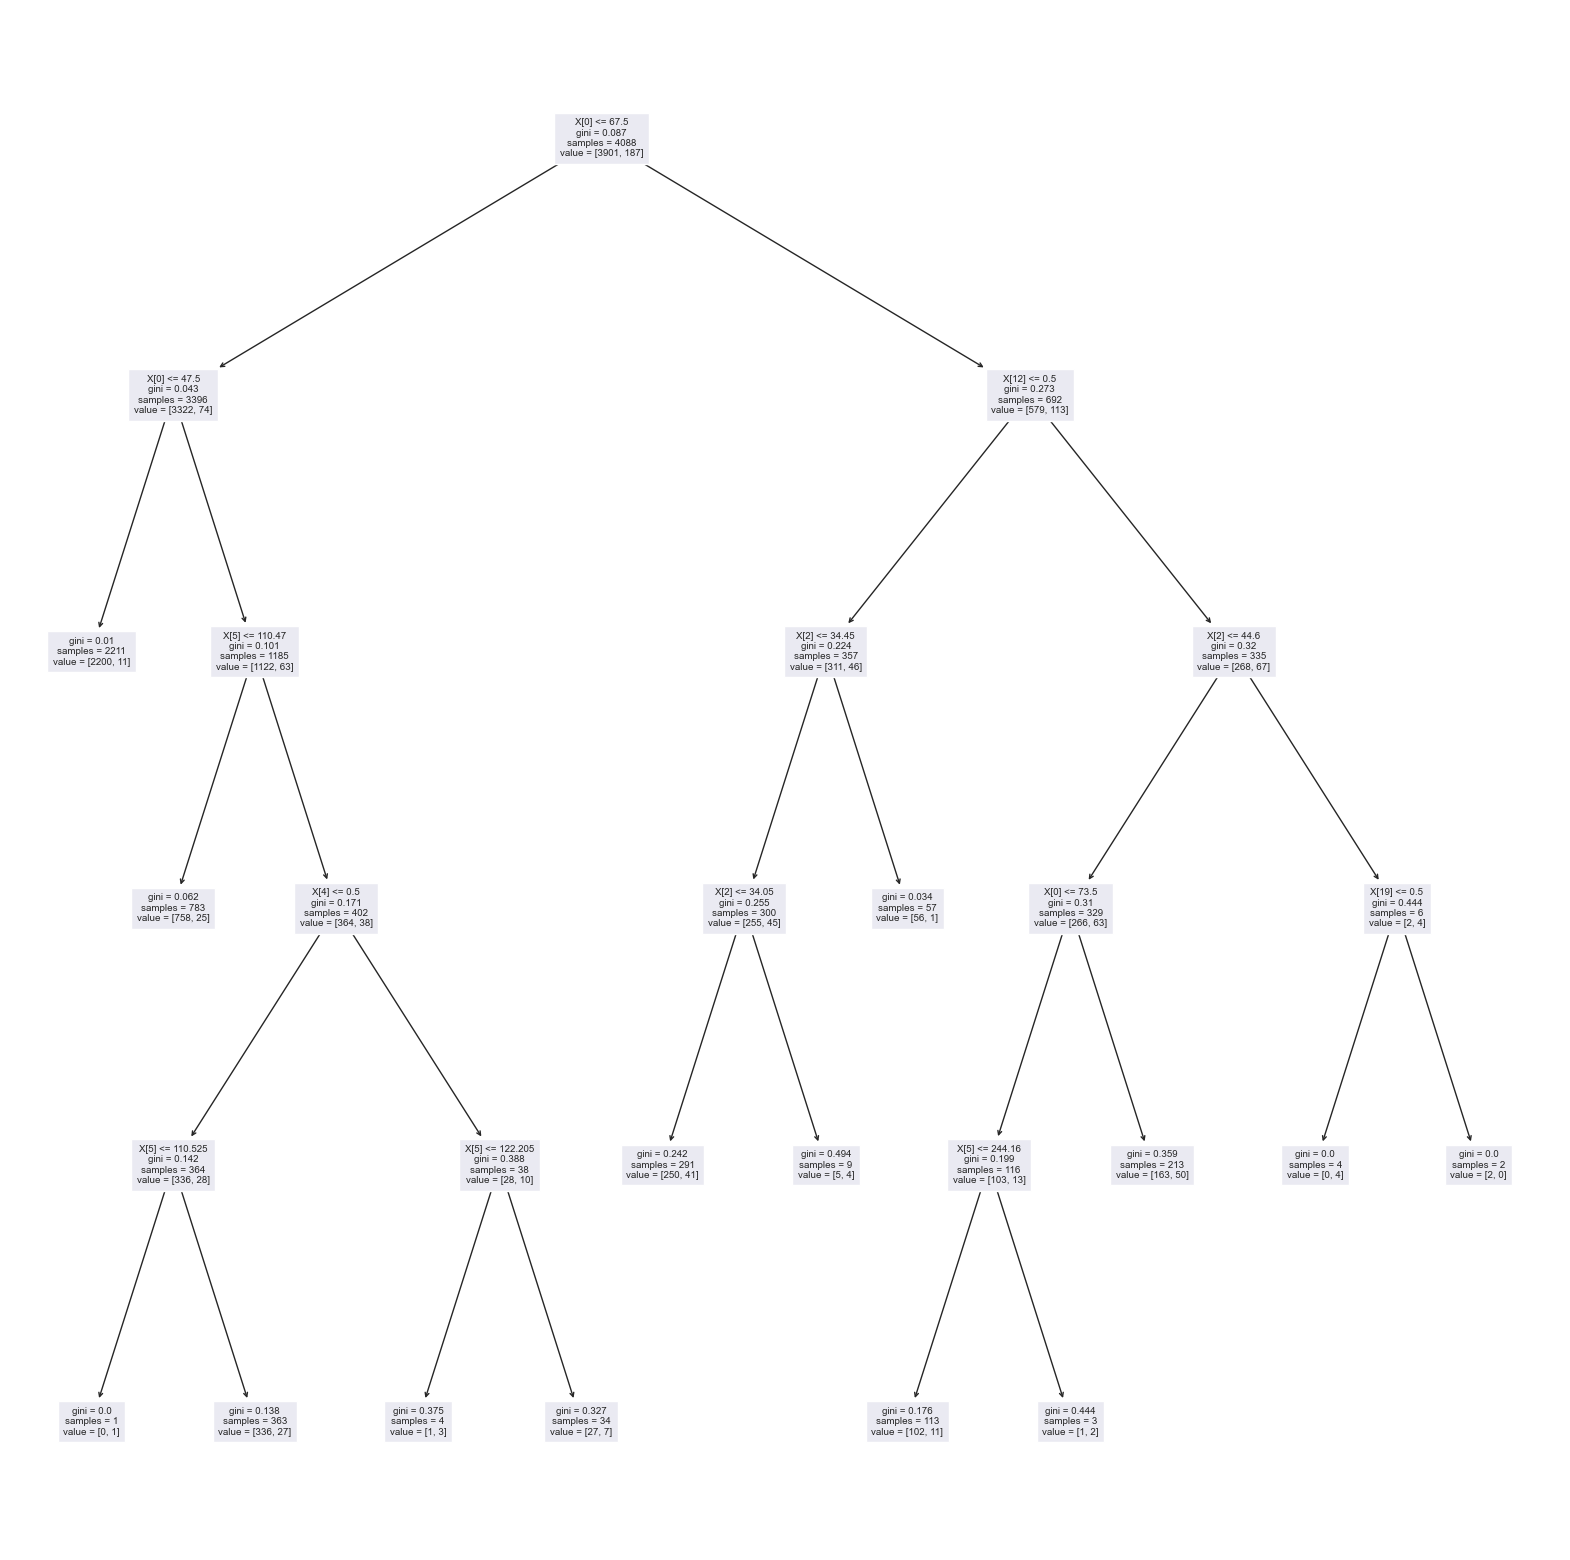

In [182]:
# ---------- without SMOTE ----------
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(dtree_tuned, fontsize=7)
#plt.savefig('Classification Tree without SMOTE.png')
plt.show()

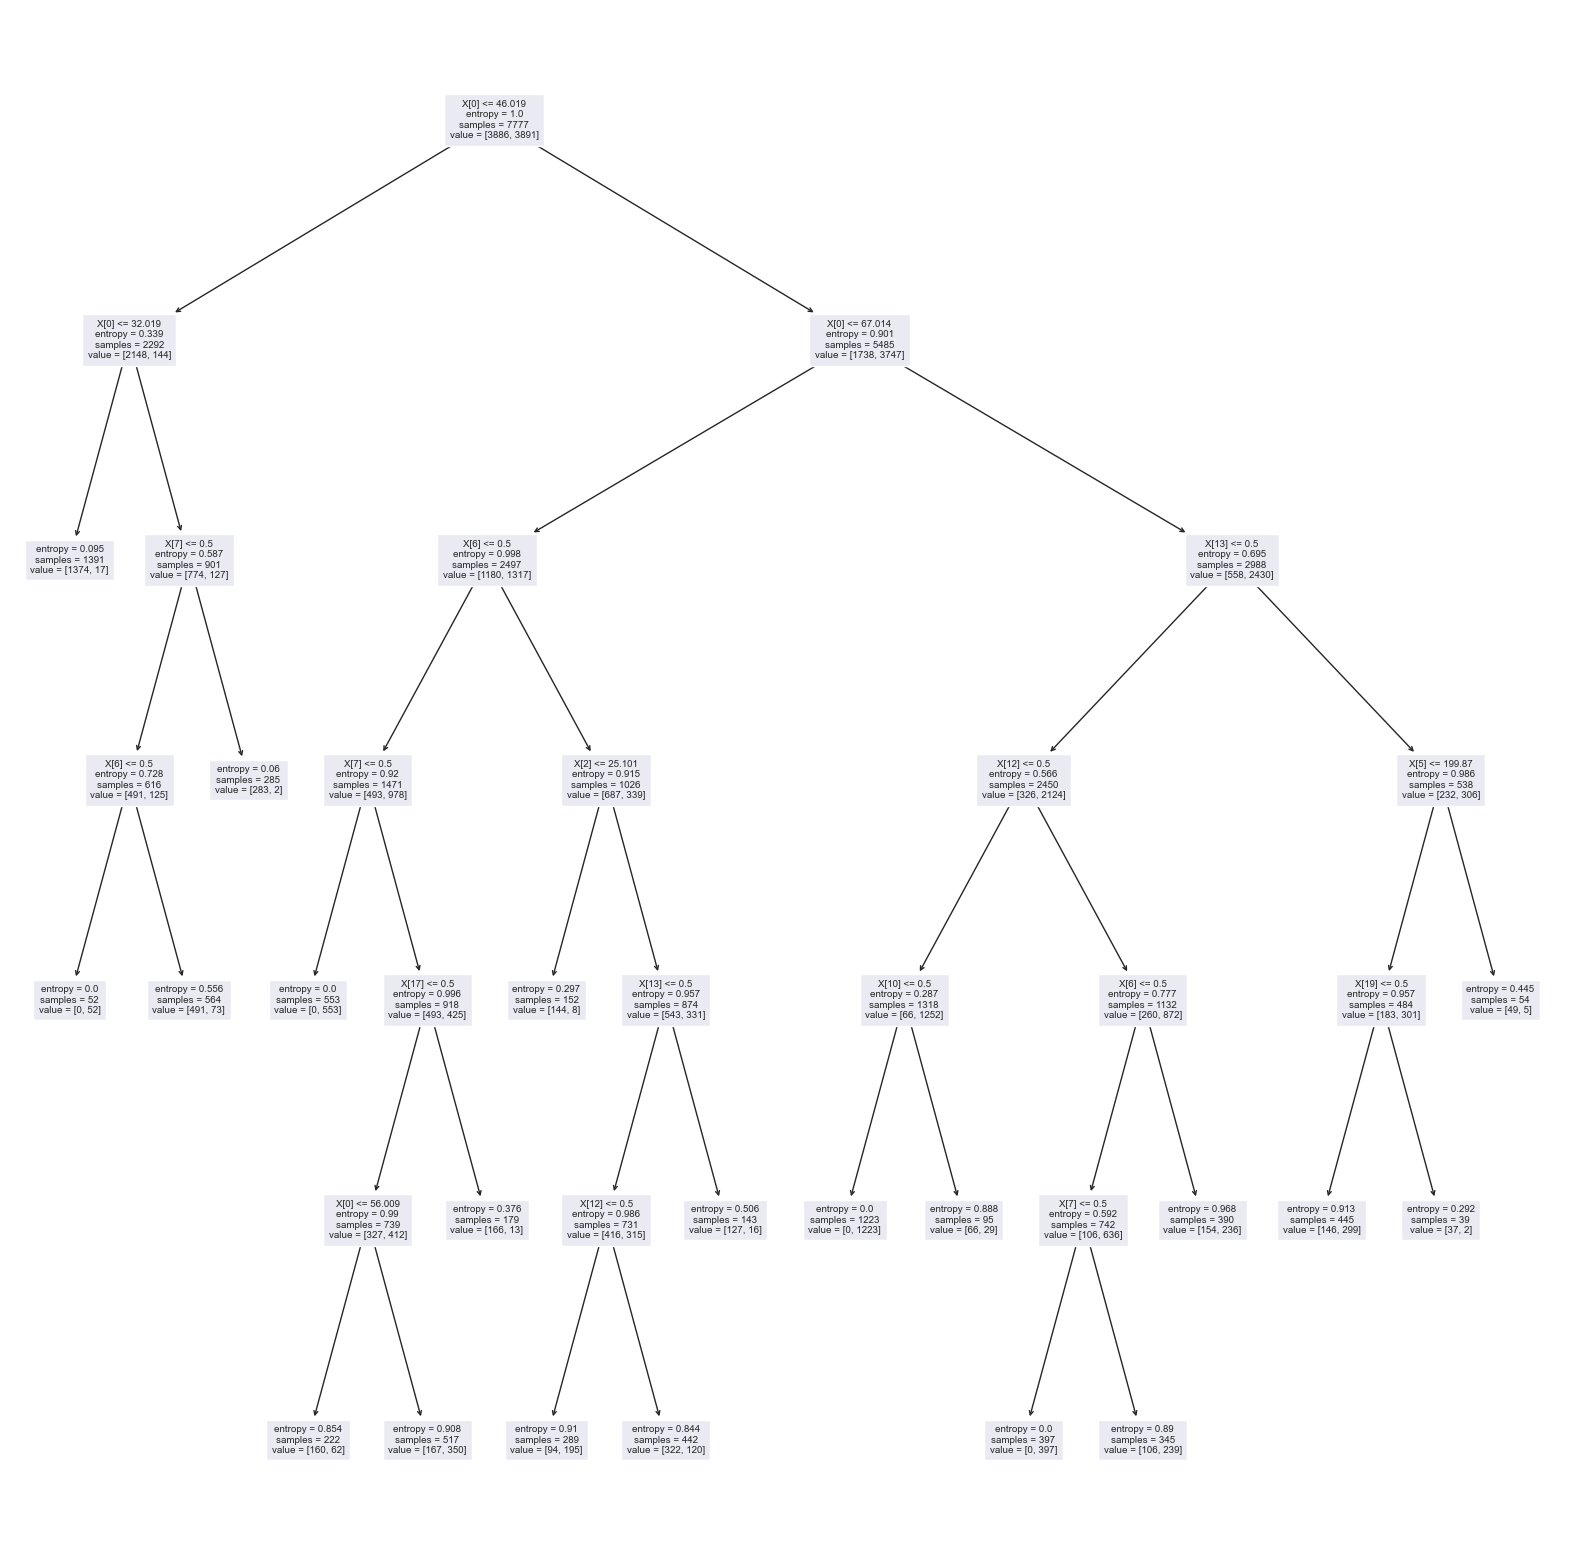

In [183]:
# ---------- with SMOTE ----------
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(dtree_tuned_res, fontsize=7)
# plt.savefig('Classification Tree with SMOTE.png')
plt.show()

### 2. Logistic Regression

"Logistic regression predicts a class value for a a variable based on the value of another variable. Although the model has regression in its name, logistic regression is for classification tasks with a categorical target variable."

Source: Lecture 4

#### Initial model

In [184]:
# Building an initial logistic regression model to predict 'Stroke'. 

# ---------- without SMOTE ----------
logr = LogisticRegression(max_iter=10000, random_state = 42)
# Fitting model to training set data without SMOTE
logr = logr.fit(X_train, y_train)

# Predicting X in testing data without SMOTE
y_logr_pred = logr.predict(X_test)

# ---------- with SMOTE ----------
logr_res = LogisticRegression(max_iter=10000, random_state = 42)

# Fitting model to training data with SMOTE
logr_res = logr_res.fit(X_train_res, y_train_res)

# Predicting X in testing data with SMOTE
y_logr_pred_res = logr_res.predict(X_test)


# Reporting the scores on training and testing set for both models
print("Accuracy on training set without SMOTE: {:.3f}".format(logr.score(X_train, y_train)))
print("Accuracy on training set with SMOTE: {:.3f}\n".format(logr_res.score(X_train_res, y_train_res)))
print("Accuracy of the model without SMOTE using testing data: {:.3f}".format(logr.score(X_test, y_test)))
print("Accuracy of the model with SMOTE using testing data: {:.3f}\n".format(logr_res.score(X_test, y_test)))
print('Precision-score without SMOTE: %.3f' % precision_score(y_test, y_logr_pred))
print('Precision-score with SMOTE: %.3f \n' % precision_score(y_test, y_logr_pred_res))
print('Recall-score without SMOTE: %.3f' % recall_score(y_test, y_logr_pred))
print('Recall-score with SMOTE: %.3f' % recall_score(y_test, y_logr_pred_res))

# Reporting the coefficiens
coefficient = logr.coef_ # without SMOTE
coefficient_res = logr_res.coef_ # with SMOTE

print('Coefficients without SMOTE:')
print(coefficient)
print('Coefficients with SMOTE:')
print(coefficient_res)


Accuracy on training set without SMOTE: 0.955
Accuracy on training set with SMOTE: 0.958

Accuracy of the model without SMOTE using testing data: 0.939
Accuracy of the model with SMOTE using testing data: 0.941

Precision-score without SMOTE: 0.000
Precision-score with SMOTE: 0.600 

Recall-score without SMOTE: 0.000
Recall-score with SMOTE: 0.097
Coefficients without SMOTE:
[[ 0.07506045 -0.28751489  0.00485214  0.34769874  0.26830673  0.00375515
  -0.01981869  0.00576539  0.          0.64263056 -0.17954457 -0.10978078
   0.01356192 -0.38092041 -0.02176764  0.00771435 -0.07007493 -0.12732259
   0.19148097 -0.00813674]]
Coefficients with SMOTE:
[[ 8.36103974e-02 -4.63544689e-01  1.49805646e-02 -2.09411787e-01
  -1.26440260e-01  4.64558390e-03 -4.34307569e+00 -4.14653888e+00
  -2.14254763e-01 -2.12593899e+00 -4.29008291e+00 -8.86874816e-01
  -3.67242681e+00 -4.27244765e+00 -4.42258598e+00 -4.43592488e+00
  -4.53480895e+00 -4.39613535e+00 -4.39727050e+00 -4.67663153e+00]]


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Score:** The logistic regression score is a measure of the mean accuracy on the given data. 

**Coefficient:** "There's a value for each of the 6 possible house types. Technically, each coefficient is different, but because they're basically 0 and rounded, they look the same here.
Why are they all basically 0? Well, there's basically no association between house type and price. We can also see this in the very bad fit of the model to the data: *^2 = 0.083." (lecture 4)

PROBLEM

In [185]:
# Using RandomizedSearchCV to optimize hyperparameters for LogisticRegression
# Declaring parameters to search through 
parameters = {'max_iter' : (80,90,100,110,120,130,140,150,160,180),
             'solver' : ('newton-cg','lbfgs','sag','saga')}


# Creating models through RandomizedSearchCV with Standardscaler for datasets with and without SMOTE
logr_tuned_pipeline  = make_pipeline(StandardScaler(), 
                                     RandomizedSearchCV(LogisticRegression(), 
                                                        random_state = 5, param_distributions = parameters, 
                                                        cv = 5, verbose = True, scoring = 'recall'))
logr_tuned_pipeline_res  = make_pipeline(StandardScaler(), 
                                        RandomizedSearchCV(LogisticRegression(), 
                                                           random_state = 5, param_distributions = parameters, 
                                                           cv = 5, verbose = True, scoring = 'recall'))

# Fitting models to training set with and without SMOTE
logr_tuned = logr_tuned_pipeline.fit(X_train,y_train)
logr_tuned_res = logr_tuned_pipeline_res.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

wtf sker der

#### Identifying optimal hyperparameters

In [186]:
# ---------- without SMOTE----------
# Identifying the best hyperparameters without SMOTE
logr_tuned[1].best_params_

{'solver': 'newton-cg', 'max_iter': 130}

In [187]:
# ---------- with SMOTE----------
# Identifying the best hyperparameters with SMOTE
logr_tuned_res[1].best_params_

{'solver': 'saga', 'max_iter': 180}

#### Optimized models

In [188]:
# Building optimized models using the identified optimal hyperparameters

# ---------- without SMOTE----------
logr_tuned = LogisticRegression(max_iter=130, solver='newton-cg')

# ---------- with SMOTE----------
logr_tuned_res = LogisticRegression(max_iter=80, solver='saga')


In [189]:
# Fitting the optimized models to training set 

# ---------- without SMOTE----------
logr_tuned.fit(X_train, y_train)
# ---------- with SMOTE----------
logr_tuned_res.fit(X_train_res, y_train_res)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=80, solver='saga')

#### Predicting task

In [190]:
# ---------- without SMOTE----------
# Predicting X in testing data without SMOTE
y_logr_pred = logr_tuned.predict(X_test)

# ---------- with SMOTE----------
# Predicting X in testing data with SMOTE
y_logr_pred_res= logr_tuned_res.predict(X_test)

# Printing accuracy-score on training and testing set for both models
print("Accuracy on training set without SMOTE: {:.3f}".format(logr_tuned.score(X_train, y_train)))
print("Accuracy on training set with SMOTE: {:.3f}\n".format(logr_tuned_res.score(X_train_res, y_train_res)))
print("Accuracy of the model without SMOTE using testing data: {:.3f}".format(logr_tuned.score(X_test, y_test)))
print("Accuracy of the model with SMOTE using testing data: {:.3f}\n".format(logr_tuned_res.score(X_test, y_test)))
print('Precision-score without SMOTE: %.3f' % precision_score(y_test, y_logr_pred))
print('Precision-score with SMOTE: %.3f \n' % precision_score(y_test, y_logr_pred_res))
print('Recall-score without SMOTE: %.3f' % recall_score(y_test, y_logr_pred))
print('Recall-score with SMOTE: %.3f' % recall_score(y_test, y_logr_pred_res))



Accuracy on training set without SMOTE: 0.955
Accuracy on training set with SMOTE: 0.864

Accuracy of the model without SMOTE using testing data: 0.939
Accuracy of the model with SMOTE using testing data: 0.826

Precision-score without SMOTE: 0.000
Precision-score with SMOTE: 0.207 

Recall-score without SMOTE: 0.000
Recall-score with SMOTE: 0.661


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Confusion Matrix Plots

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


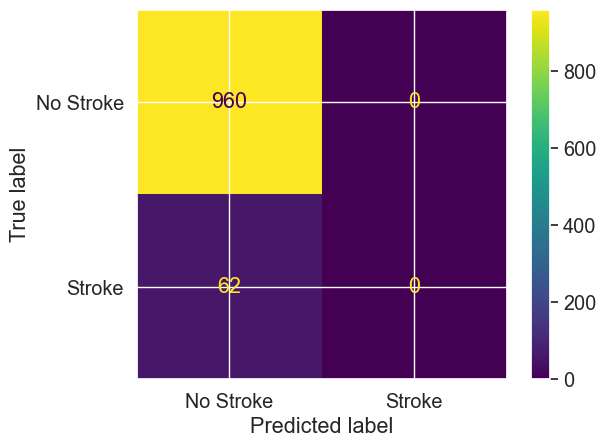

In [191]:
# ---------- without SMOTE----------
# Plotting confusion matrix for model without SMOTE
plot_confusion_matrix(logr_tuned, X_test, y_test, display_labels = ["No Stroke", "Stroke"])




/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


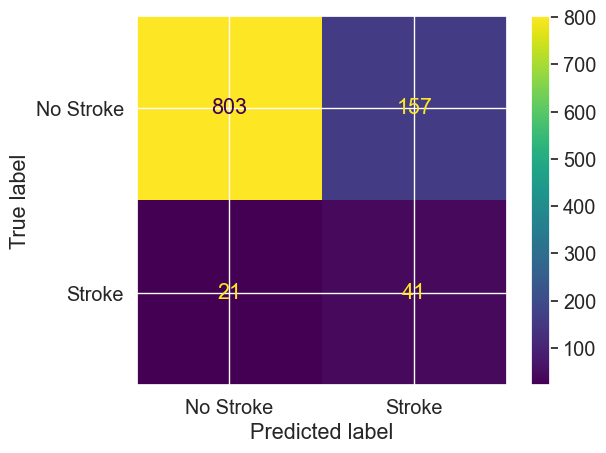

In [192]:
# ---------- with SMOTE----------
# Plotting confusion matrix for model with SMOTE
plot_confusion_matrix(logr_tuned_res, X_test, y_test, display_labels = ["No Stroke", "Stroke"])



In [193]:
# Printing precision and recall score for model with and without SMOTE
print('Precision-score without SMOTE: %.3f' % precision_score(y_test, y_logr_pred))
print('Precision-score with SMOTE: %.3f \n' % precision_score(y_test, y_logr_pred_res))

print('Recall-score without SMOTE: %.3f' % recall_score(y_test, y_logr_pred))
print('Recall-score with SMOTE: %.3f' % recall_score(y_test, y_logr_pred_res))

Precision-score without SMOTE: 0.000
Precision-score with SMOTE: 0.207 

Recall-score without SMOTE: 0.000
Recall-score with SMOTE: 0.661


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN Classifier

Source: Session 6

#### Baseline model

In [194]:
#Creating an innitial  KNeighbors Classifier Model 
# 
# ---------- without SMOTE ---------- 
neigh = KNeighborsClassifier()

# Fitting model to training data without SMOTE
neigh = neigh.fit(X_train, y_train)

# Predicting X in testing data without SMOTE
y_neigh_pred = neigh.predict(X_test)

#Creating a preliminary KNeighbors Classifier with SMOTE
neigh_res = KNeighborsClassifier()

# Fitting model to training data with SMOTE
neigh_res = neigh_res.fit(X_train_res, y_train_res)

# Predicting X in testing data with SMOTE
y_neigh_pred_res = neigh_res.predict(X_test)

# Printing accuracy-score on training and testing set for both models
print("Accuracy on training set without SMOTE: {:.3f}".format(neigh.score(X_train, y_train)))
print("Accuracy on training set with SMOTE: {:.3f}\n".format(neigh_res.score(X_train_res, y_train_res)))

print("Accuracy of the model without SMOTE using testing data: {:.3f}".format(neigh.score(X_test, y_test)))
print("Accuracy of the model with SMOTE using testing data: {:.3f}\n".format(neigh_res.score(X_test, y_test)))
print('Precision-score without SMOTE: %.3f' % precision_score(y_test, y_neigh_pred))
print('Precision-score with SMOTE: %.3f \n' % precision_score(y_test, y_neigh_pred_res))
print('Recall-score without SMOTE: %.3f' % recall_score(y_test, y_neigh_pred))
print('Recall-score with SMOTE: %.3f' % recall_score(y_test, y_neigh_pred_res))

Accuracy on training set without SMOTE: 0.955
Accuracy on training set with SMOTE: 0.916

Accuracy of the model without SMOTE using testing data: 0.935
Accuracy of the model with SMOTE using testing data: 0.851

Precision-score without SMOTE: 0.000
Precision-score with SMOTE: 0.290 

Recall-score without SMOTE: 0.000
Recall-score with SMOTE: 1.000


In [195]:
# Using RandomizedSearchCV to optimize hyperparameters for KNN Classifier
# Declaring parameters to search through 
parameters = {'n_neighbors' : (5,15,35,45,55,65,75,85,95),
             'weights' : ('uniform', 'distance')}


# Creating models through RandomizedSearchCV with Standardscaler for datasets with and without SMOTE
neigh_tuned_pipeline  = make_pipeline(StandardScaler(), 
                                    RandomizedSearchCV(KNeighborsClassifier(), 
                                                       random_state = 5, param_distributions = parameters, 
                                                       cv = 5, verbose = True, scoring = 'recall'))
neigh_tuned_pipeline_res  = make_pipeline(StandardScaler(), 
                                       RandomizedSearchCV(KNeighborsClassifier(), 
                                                          random_state = 5, param_distributions = parameters, 
                                                          cv = 5, verbose = True, scoring = 'recall'))

# Fitting models to training set
# ---------- without SMOTE ----------
neigh_tuned = neigh_tuned_pipeline.fit(X_train,y_train)

# ---------- with SMOTE ----------
neigh_tuned_res = neigh_tuned_pipeline_res.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


#### Identifying optimal hyperparameters

In [196]:
# ---------- without SMOTE ----------
# Identifying the optimal hyperparameters without SMOTE
neigh_tuned[1].best_params_

{'weights': 'distance', 'n_neighbors': 5}

In [197]:
# ---------- with SMOTE ----------
# Identifying the optimal hyperparameters with SMOTE
neigh_tuned_res[1].best_params_

{'weights': 'distance', 'n_neighbors': 5}

#### Optimized models

In [198]:
# Building optimized models using the identifyed hyperparameters

# ---------- without SMOTE ----------
neigh_tuned = KNeighborsClassifier(weights='distance', n_neighbors=5)

# ---------- with SMOTE ----------
neigh_tuned_res = KNeighborsClassifier(weights='distance', n_neighbors=5)


In [199]:
# Fitting models to training set 

# ---------- without SMOTE ----------
neigh_tuned.fit(X_train, y_train)

# ---------- with SMOTE ----------
neigh_tuned_res.fit(X_train_res, y_train_res)

KNeighborsClassifier(weights='distance')

#### Predicting

In [200]:
# ---------- without SMOTE ----------
# Predicting X in testing data without SMOTE
y_neigh_pred = neigh_tuned.predict(X_test)

# ---------- with SMOTE ----------
# Predicting X in testing data with SMOTE
y_neigh_pred_res = neigh_tuned_res.predict(X_test)

# Printing accuracy-score on training and testing set for both models
print("Accuracy on training set without SMOTE: {:.3f}".format(neigh_tuned.score(X_train, y_train)))
print("Accuracy on training set with SMOTE: {:.3f}\n".format(neigh_tuned_res.score(X_train_res, y_train_res)))
print("Accuracy of the model without SMOTE using testing data: {:.3f}".format(neigh_tuned.score(X_test, y_test)))
print("Accuracy of the model with SMOTE using testing data: {:.3f}\n".format(neigh_tuned_res.score(X_test, y_test)))
print('Precision-score without SMOTE: %.3f' % precision_score(y_test, y_neigh_pred))
print('Precision-score with SMOTE: %.3f \n' % precision_score(y_test, y_neigh_pred_res))
print('Recall-score without SMOTE: %.3f' % recall_score(y_test, y_neigh_pred))
print('Recall-score with SMOTE: %.3f' % recall_score(y_test, y_neigh_pred_res))

Accuracy on training set without SMOTE: 1.000
Accuracy on training set with SMOTE: 1.000

Accuracy of the model without SMOTE using testing data: 0.933
Accuracy of the model with SMOTE using testing data: 0.948

Precision-score without SMOTE: 0.000
Precision-score with SMOTE: 0.539 

Recall-score without SMOTE: 0.000
Recall-score with SMOTE: 1.000


#### Confusion Matrix Plots

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


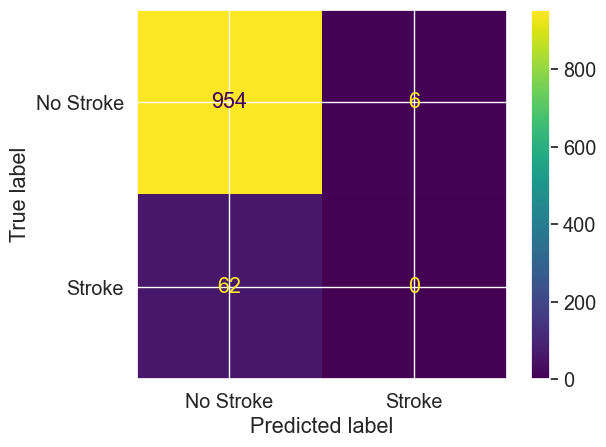

In [201]:
# ---------- without SMOTE ----------
# Plotting confusion matrix for model without SMOTE
plot_confusion_matrix(neigh_tuned, X_test, y_test, display_labels = ["No Stroke", "Stroke"])




/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


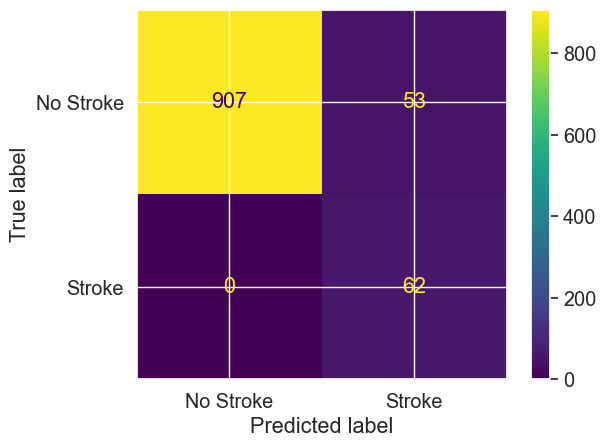

In [202]:
# ---------- with SMOTE ----------
# Plotting confusion matrix for model with SMOTE
plot_confusion_matrix(neigh_tuned_res, X_test, y_test, display_labels = ["No Stroke", "Stroke"])



In [203]:
# Printing precision and recall score for model with and without SMOTE
print('Precision-score without SMOTE: %.3f' % precision_score(y_test, y_neigh_pred))
print('Precision-score with SMOTE: %.3f \n' % precision_score(y_test, y_neigh_pred_res))

print('Recall-score without SMOTE: %.3f' % recall_score(y_test, y_neigh_pred))
print('Recall-score with SMOTE: %.3f' % recall_score(y_test, y_neigh_pred_res))

Precision-score without SMOTE: 0.000
Precision-score with SMOTE: 0.539 

Recall-score without SMOTE: 0.000
Recall-score with SMOTE: 1.000


# 5. Evaluation

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2148: UserWarning: labels size, 10, does not match size of target_names, 2
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` 

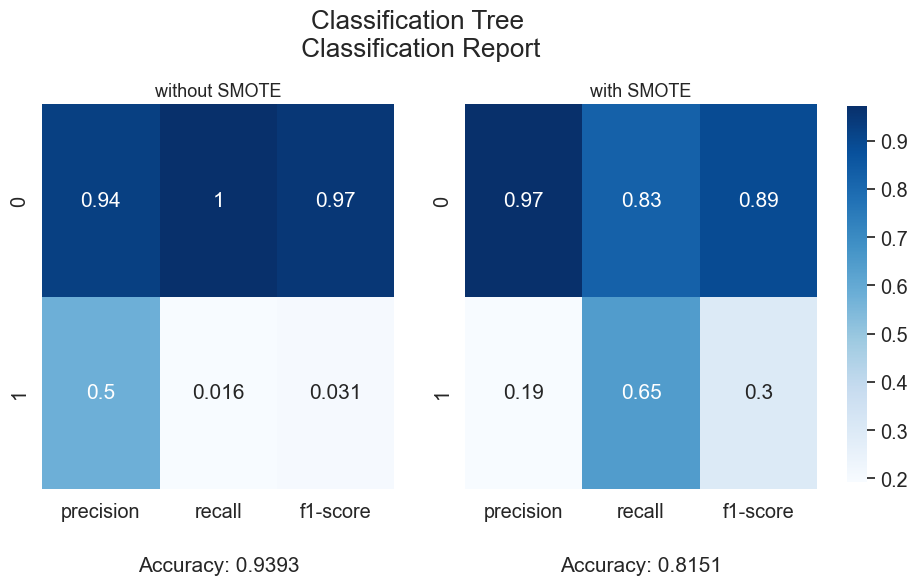

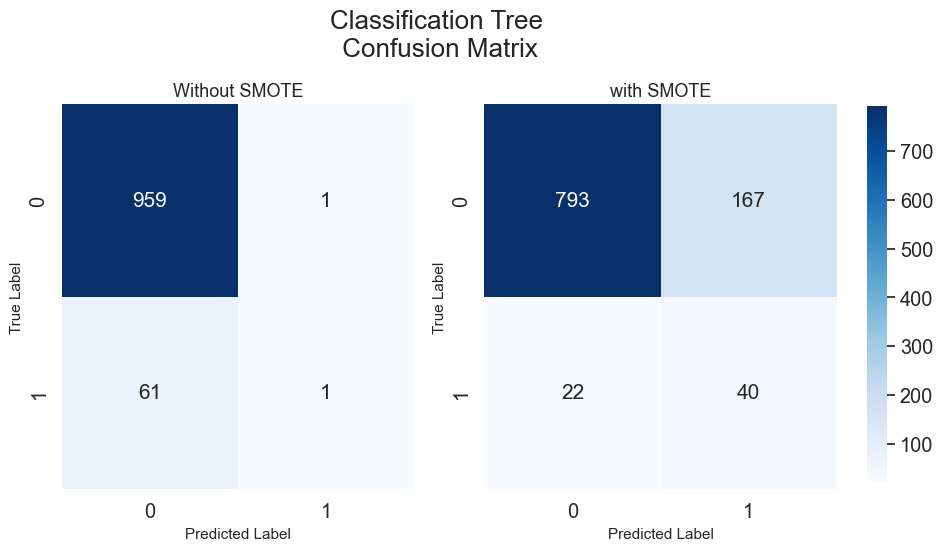

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2148: UserWarning: labels size, 10, does not match size of target_names, 2
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` 

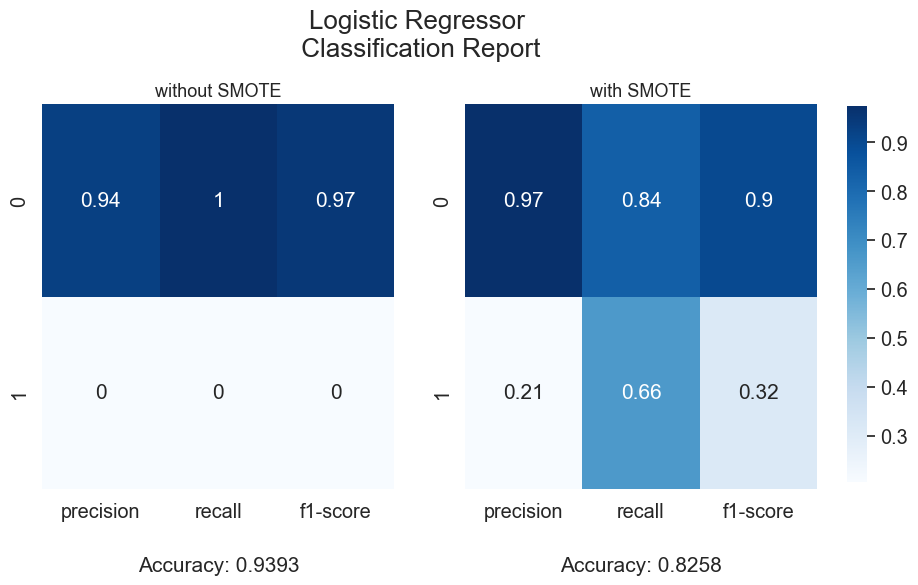

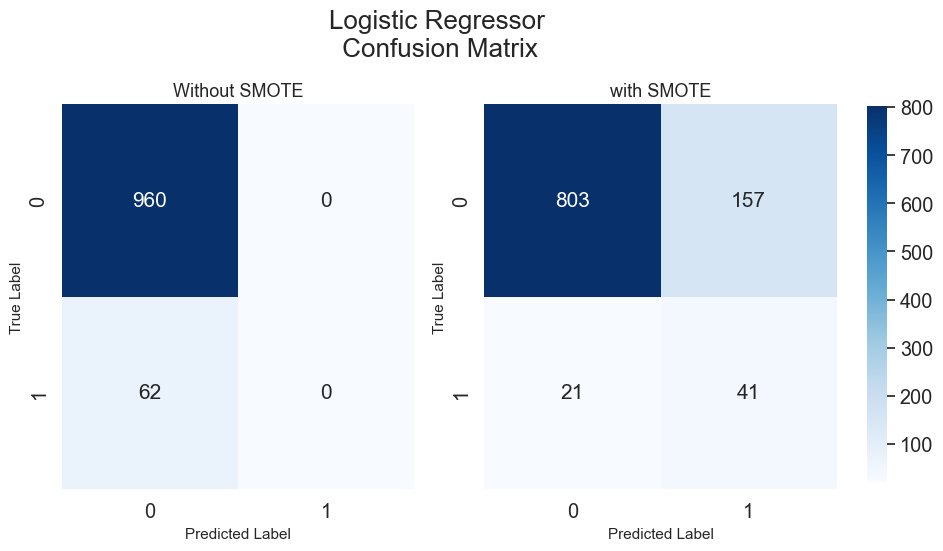

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2148: UserWarning: labels size, 10, does not match size of target_names, 2
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` 

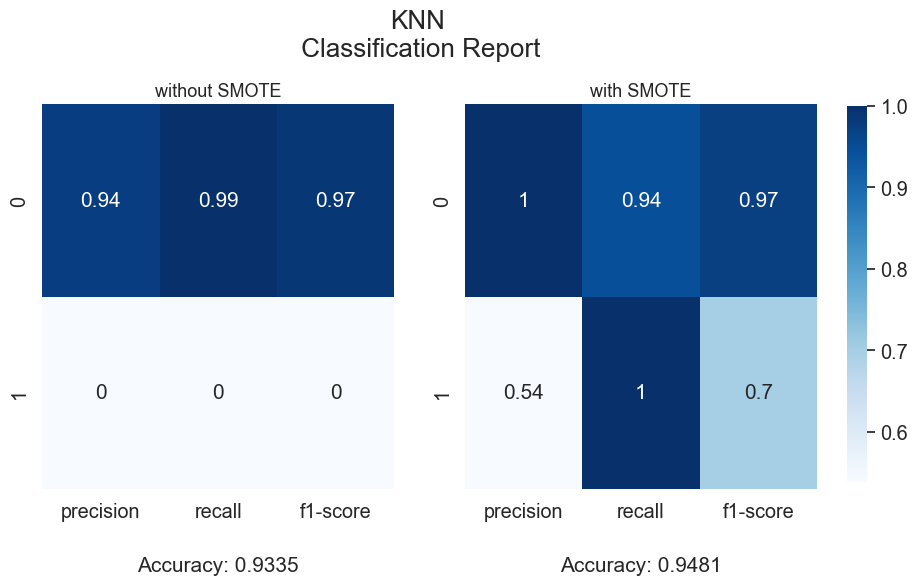

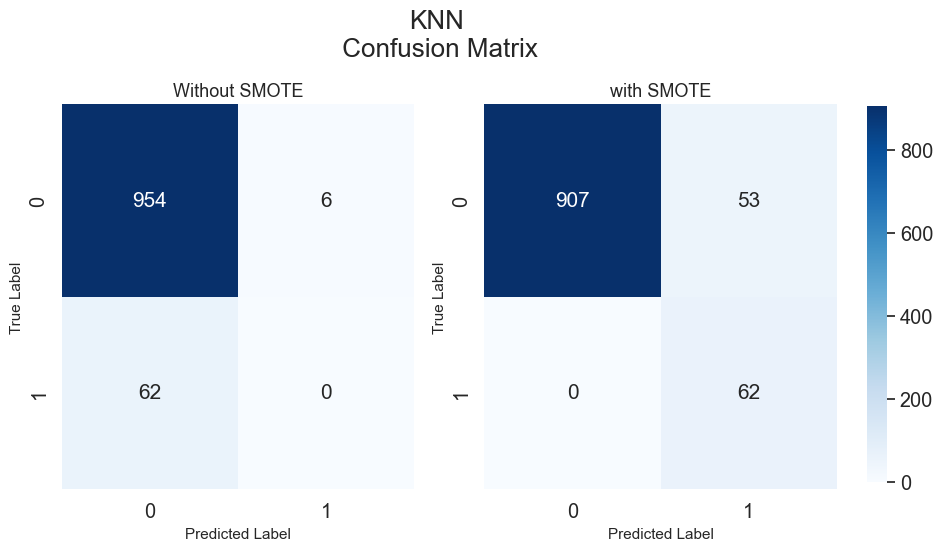

In [204]:
# Creating dynamic functions to visualize scoring-metrics and confusion matrix for all models
labels = np.arange(10)
target_names = list("01")

# Creating a function that plots a classification report showing (recall, precision, f1, and accuracy)
def plot_classification_report(y_test, y_pred, y_pred_res, title): # Takes in predictions from each model trained both with and without SMOTE
    dtree_report = classification_report(y_test, y_pred, labels=labels, target_names=target_names, output_dict=True)
    dtree_report_res = classification_report(y_test, y_pred_res, labels=labels, target_names=target_names, output_dict=True)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    accuracy_sm = round(accuracy_score(y_test, y_pred_res), 4)

    fig = plt.figure(figsize=(10,5)) # Declearing figure for the classification reports
    sns.set(font_scale=1.3)
    fig.suptitle(title + "\n Classification Report", y=1.07)
    cbar_ax = fig.add_axes([.93, 0.125, .02, 0.752]) # Assigning color, bar size, and location

    plt.subplot(1,2,1) # Subplotting model trained without SMOTE
    sns.heatmap(pd.DataFrame(dtree_report).iloc[:-1, :2].T, annot=True, cmap="Blues", cbar=None,annot_kws={"fontsize":15}) # Including accuracy, recall, and f1-score
    plt.title("without SMOTE", fontsize=13)
    plt.xlabel(("Accuracy: " + str(accuracy)), fontsize=15, labelpad=25)

    plt.subplot(1,2,2) # Subplot for model trained with SMOTE
    sns.heatmap(pd.DataFrame(dtree_report_res).iloc[:-1, :2].T, annot=True, cmap="Blues", annot_kws={"fontsize":15}, cbar_ax=cbar_ax) # Including accuracy, recall, and f1-score
    plt.title("with SMOTE", fontsize=13)
    plt.xlabel(("Accuracy: " + str(accuracy_sm)), fontsize=15, labelpad=25)
    plt.savefig(title +  "_classification_report", bbox_inches='tight') # Saves plot as a png file
    plt.show()

# Creating function that plots confusion matrix
def plot_confusion_matrix(y_test, y_pred, y_pred_res, title): # Takes in predictions from each model trained both with and without SMOTE
    cf_matrix = confusion_matrix(y_test, y_pred)
    cf_matrix_res = confusion_matrix(y_test, y_pred_res)

    fig = plt.figure(figsize=(10,5)) # Declearing figure for the confusion matrices
    sns.set(font_scale=1.3)
    fig.suptitle(title + "\n Confusion Matrix", y=1.07)
    cbar_ax = fig.add_axes([.93, 0.125, .02, 0.752]) # Assigning color bar size and location

    plt.subplot(1,2,1)
    sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="d", cbar=None, annot_kws={"fontsize":15})
    plt.title("Without SMOTE", fontsize=13)
    plt.ylabel("True Label", fontsize=11)
    plt.xlabel("Predicted Label", fontsize=11)

    plt.subplot(1,2,2)
    sns.heatmap(cf_matrix_res, annot=True, cmap="Blues", fmt="d", annot_kws={"fontsize":15}, cbar_ax=cbar_ax)
    plt.title("with SMOTE", fontsize=13)
    plt.ylabel("True Label", fontsize=11)
    plt.xlabel("Predicted Label", fontsize=11)
    plt.savefig(title + "_confusion_matrix", bbox_inches='tight') # Saves plot as a png file
    plt.show()
    
    # Plotting classification reports and confusion matrix
plot_classification_report(y_test, y_dtree_pred, y_dtree_pred_res, "Classification Tree")
plot_confusion_matrix(y_test, y_dtree_pred, y_dtree_pred_res, "Classification Tree")

plot_classification_report(y_test, y_logr_pred, y_logr_pred_res, "Logistic Regressor")
plot_confusion_matrix(y_test, y_logr_pred, y_logr_pred_res, "Logistic Regressor")

plot_classification_report(y_test, y_neigh_pred, y_neigh_pred_res, "KNN")
plot_confusion_matrix(y_test, y_neigh_pred, y_neigh_pred_res, "KNN")